### Importing Libraries and Dataset

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_excel('data.xlsx')

### General dataset checking

In [77]:
df.head()

,ID,First name,Last name,Preferred brand,Wear 1,Wear 2,Preference,Budget,Frequency/year,Mode of Shopping,Staff/Product review,Fabric 1,Fabric 2,Colours 1,Colors 2,Age Range
0,27,Puneet,Gupta,FabIndia,Casual,Festive,Kurtas,4000,3,Offline,4.0,Cotton blends,NaN,Light,NaN,35-40
1,9,Divyank,Jain,Manyavar,Ethnic,NaN,Sherwanis,40000,2,Offline,4.0,Raw silk,NaN,Light,NaN,35-40
2,26,Ishika,Saxena,FabIndia,Festive,NaN,Kurtis,5000,4,Both,5.0,Rayon,Cotton,Red,Green,35-40
3,12,Diya,Kaur,Biba,Ethnic,Casual,Kurtis,8000,4,Offline,4.5,Cotton,Silk,Pastel,NaN,25-30
4,7,Armaan,Jain,Manyavar,Ethnic,NaN,Kurtas,10000,2,Offline,4.5,Cotton blends,NaN,Black,NaN,25-30


In [78]:
df.describe()

,ID,Budget,Frequency/year,Staff/Product review
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,7833.333333,2.400000,4.483333
std,8.803408,7400.295117,0.932183,0.463929
min,1.000000,2000.000000,1.000000,3.500000
25%,8.250000,4000.000000,2.000000,4.000000
50%,15.500000,6000.000000,2.000000,4.500000
75%,22.750000,8000.000000,3.000000,5.000000
max,30.000000,40000.000000,4.000000,5.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    30 non-null     int64  
 1   First name            30 non-null     object 
 2   Last name             30 non-null     object 
 3   Preferred brand       30 non-null     object 
 4   Wear 1                30 non-null     object 
 5   Wear 2                3 non-null      object 
 6   Preference            30 non-null     object 
 7   Budget                30 non-null     int64  
 8   Frequency/year        30 non-null     int64  
 9   Mode of Shopping      30 non-null     object 
 10  Staff/Product review  30 non-null     float64
 11  Fabric 1              30 non-null     object 
 12  Fabric 2              11 non-null     object 
 13  Colours 1             30 non-null     object 
 14  Colors 2              2 non-null      object 
 15  Age Range             30 

In [80]:
df.columns

Index(['ID', 'First name', 'Last name', 'Preferred brand', 'Wear 1', 'Wear 2',
       'Preference', 'Budget', 'Frequency/year', 'Mode of Shopping',
       'Staff/Product review', 'Fabric 1', 'Fabric 2', 'Colours 1', 'Colors 2',
       'Age Range'],
      dtype='object')

- there are brand preference for each customer
- customer likes many wears
- customer prefer to wear
- cutomers sets some budget for each trip to the store
- customer prefers to buy by both online and offline mode

### Plotting Graphs to analyze the dataset

##### How much an individual spends on certain brand

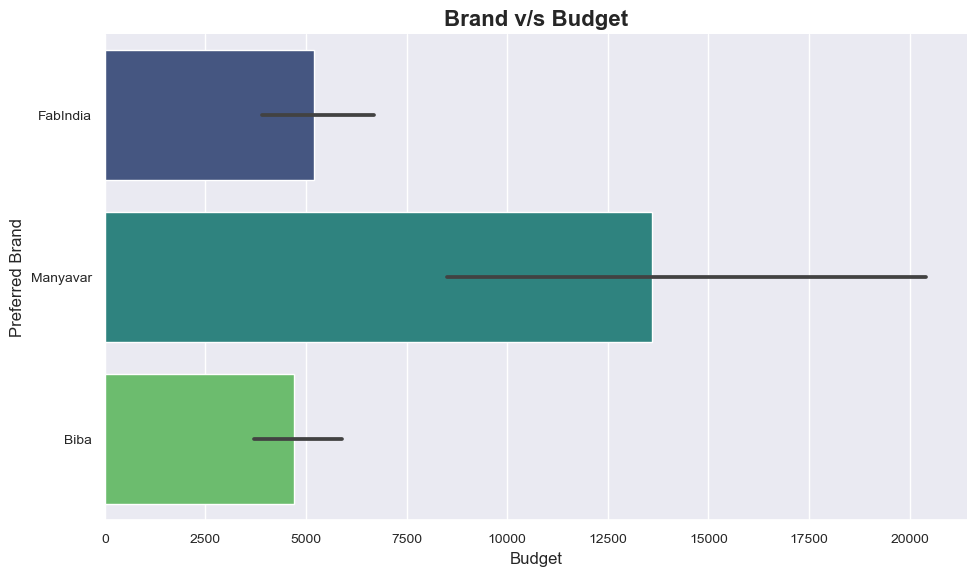

In [83]:
brands = df['Preferred brand'].unique()

sns.set_style('darkgrid')
plt.figure(figsize=(10, 6)) 
sns.barplot(x=df['Budget'], y='Preferred brand', data=df, palette='viridis')

plt.title('Brand v/s Budget', fontsize=16, weight='bold')  
plt.xlabel('Budget', fontsize=12)  
plt.ylabel('Preferred Brand', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
sns.despine()  
plt.tight_layout()

plt.show()

##### What product a customer likes from its brand

In [84]:
df.groupby(by=['Preferred brand','Wear 1']).count()['ID']

Preferred brand  Wear 1 
Biba             Casual     3
                 Ethnic     3
                 Festive    4
FabIndia         Casual     2
                 Ethnic     4
                 Festive    4
Manyavar         Ethnic     8
                 Festive    2
Name: ID, dtype: int64

<Figure size 1400x700 with 0 Axes>

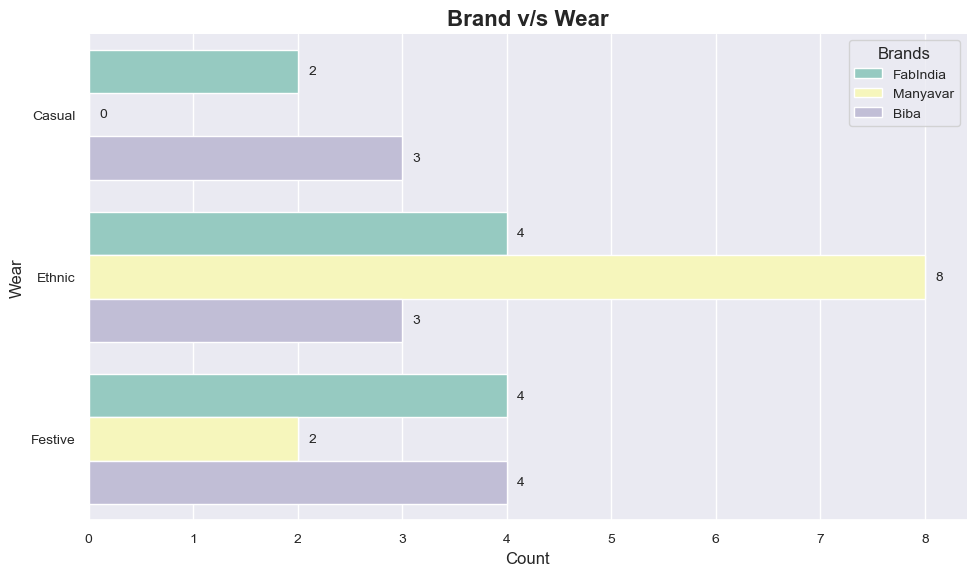

In [85]:
fig = plt.figure(figsize=(14,7))

df1 = pd.DataFrame({'Wear': ['Casual', 'Casual', 'Casual', 'Ethnic', 'Ethnic', 'Ethnic', 'Festive', 'Festive', 'Festive'],
    'Brand': ['FabIndia', 'Manyavar', 'Biba', 'FabIndia', 'Manyavar', 'Biba', 'FabIndia', 'Manyavar', 'Biba'],
    'Count': [2, 0, 3, 4, 8, 3, 4, 2, 4]})

plt.figure(figsize=(10, 6)) 

ax = sns.barplot(x='Count', y='Wear', hue='Brand', data=df1, palette='Set3')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width + 0.1, y + height / 2), ha='left', va='center', fontsize=10)

plt.title('Brand v/s Wear', fontsize=16, weight='bold')  
plt.xlabel('Count', fontsize=12)  
plt.ylabel('Wear', fontsize=12)  
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
sns.despine()  
plt.legend(title='Brands', title_fontsize='12', fontsize='10', loc='best')  

plt.tight_layout() 
plt.show()

##### What mode of shopping consumer prefers

In [86]:
df.groupby(by=['Preferred brand','Mode of Shopping']).count()['ID']

Preferred brand  Mode of Shopping
Biba             Both                3
                 Offline             7
FabIndia         Both                1
                 Offline             8
                 Online              1
Manyavar         Both                3
                 Offline             7
Name: ID, dtype: int64

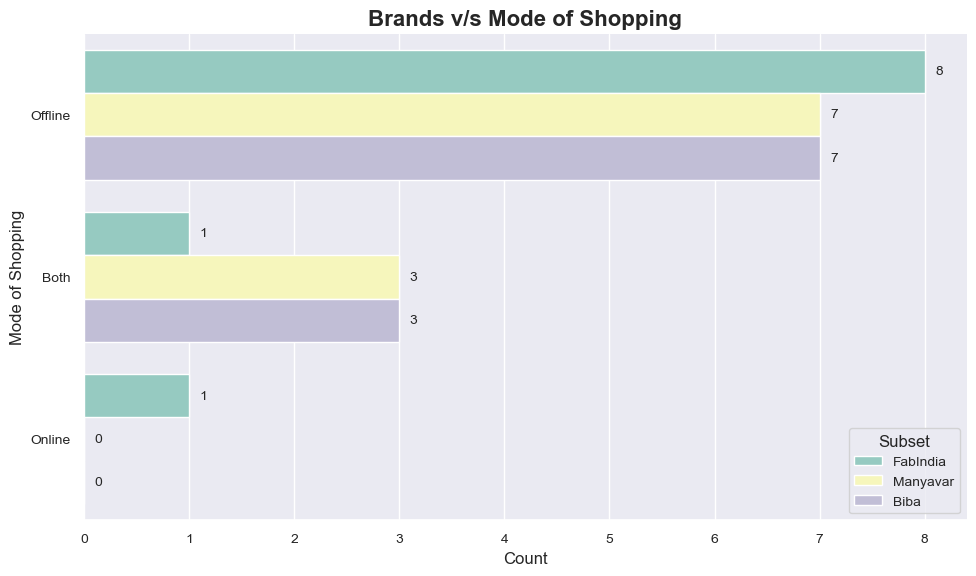

In [87]:
df1 = pd.DataFrame({
    'Mode': ['Offline', 'Offline', 'Offline', 'Both', 'Both', 'Both', 'Online', 'Online', 'Online'],
    'Brand': ['FabIndia', 'Manyavar', 'Biba', 'FabIndia', 'Manyavar', 'Biba', 'FabIndia', 'Manyavar', 'Biba'],
    'Count': [8, 7, 7, 1, 3, 3, 1, 0, 0]
})

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Count', y='Mode', hue='Brand', data=df1, palette='Set3')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width + 0.1, y + height / 2), ha='left', va='center', fontsize=10)

plt.title('Brands v/s Mode of Shopping', fontsize=16, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Mode of Shopping', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine()

plt.legend(title='Subset', title_fontsize='12', fontsize='10', loc='lower right', bbox_to_anchor=(1.0, 0.0))

plt.tight_layout()
plt.show()


##### Brand and their reviews

In [88]:
df.groupby(by=['Preferred brand','Staff/Product review']).count()['ID']

Preferred brand  Staff/Product review
Biba             3.5                     1
                 4.0                     3
                 4.5                     5
                 5.0                     1
FabIndia         4.0                     2
                 4.5                     3
                 5.0                     5
Manyavar         3.5                     1
                 4.0                     2
                 4.5                     3
                 5.0                     4
Name: ID, dtype: int64

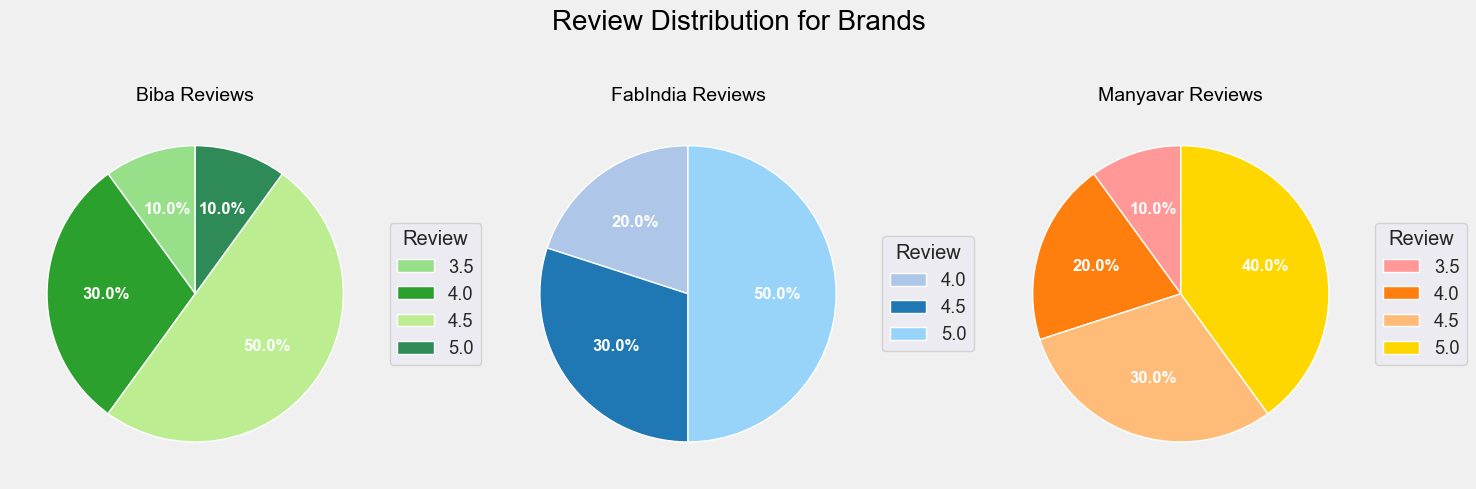

In [89]:
biba_df = pd.DataFrame({'review': [3.5, 4, 4.5, 5], 'count': [1, 3, 5, 1]})
fab_df = pd.DataFrame({'review': [4, 4.5, 5], 'count': [2, 3, 5]})
man_df = pd.DataFrame({'review': [3.5, 4, 4.5, 5], 'count': [1, 2, 3, 4]})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('#F0F0F0')

man_colors = ['#FF9896', '#FF7F0E', '#FFBB78', '#FFD700']
fab_colors = ['#AEC7E8', '#1F77B4', '#98D4F9']
biba_colors = ['#98DF8A', '#2CA02C', '#BCED91', '#2E8B57']

def plot_pie_chart(df, ax, title, colors):
    wedges, texts, autotexts = ax.pie(df['count'], autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(title, fontsize=14, color='black')
    ax.legend(wedges, df['review'], title='Review', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    for text in texts:
        text.set(size=12, weight='bold', color='black')
    for autotext in autotexts:
        autotext.set(size=12, weight='bold', color='white')

plot_pie_chart(biba_df, axes[0], 'Biba Reviews', biba_colors)
plot_pie_chart(fab_df, axes[1], 'FabIndia Reviews', fab_colors)
plot_pie_chart(man_df, axes[2], 'Manyavar Reviews', man_colors)

plt.suptitle('Review Distribution for Brands', fontsize=20, color='black', y=1.02)

plt.tight_layout()
plt.show()


##### Consumer's Age group brand-wise

In [90]:
df.groupby(by=['Preferred brand','Age Range']).count()['ID']

Preferred brand  Age Range
Biba             20-25        3
                 25-30        3
                 30-35        1
                 35-40        1
                 40-45        1
                 Below 20     1
FabIndia         20-25        3
                 35-40        5
                 45-50        1
                 Below 20     1
Manyavar         20-25        2
                 25-30        3
                 30-35        3
                 35-40        1
                 45-50        1
Name: ID, dtype: int64

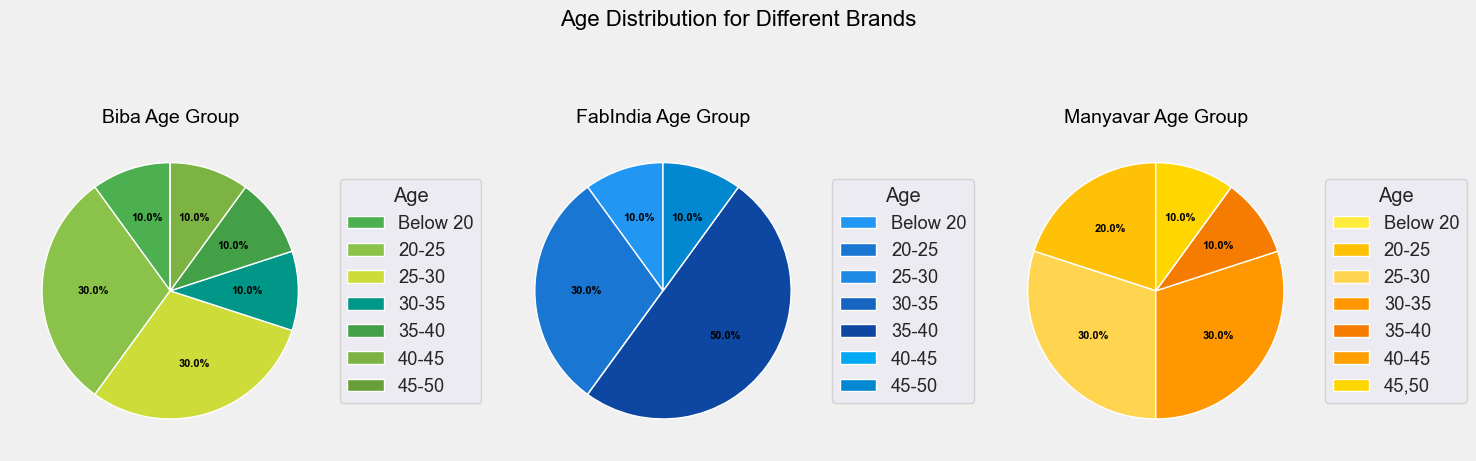

In [129]:
biba_age = pd.DataFrame({'Age': ['Below 20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50'],
                         'count': [1, 3, 3, 1, 1, 1, 0]})
fab_age = pd.DataFrame({'Age': ['Below 20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50'],
                         'count': [1, 3, 0, 0, 5, 0, 1]})
man_age = pd.DataFrame({'Age': ['Below 20', '20-25', '25-30', '30-35', '35-40', '40-45', '45,50'],
                         'count': [0, 2, 3, 3, 1, 0, 1]})

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('#F0F0F0')

biba_colors = ['#4CAF50', '#8BC34A', '#CDDC39', '#009688', '#43A047', '#7CB342', '#689F38']
fab_colors = ['#2196F3', '#1976D2', '#1E88E5', '#1565C0', '#0D47A1', '#03A9F4', '#0288D1']
man_colors = ['#FFEB3B', '#FFC107', '#FFD54F', '#FF9800', '#F57C00', '#FFA000', '#FFD600']

def plot_pie_chart_with_labels(df, ax, title, colors):
    wedges, texts, autotexts = ax.pie(df['count'], autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "", startangle=90, 
                                      colors=colors)
    ax.set_title(title, fontsize=14, color='black')
    ax.legend(wedges, df['Age'], title='Age', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    for text, autotext in zip(texts, autotexts):
        text.set(size=8, weight='bold', color='black')
        autotext.set(size=8, weight='bold', color='black')

plot_pie_chart_with_labels(biba_age, axes[0], 'Biba Age Group', biba_colors)
plot_pie_chart_with_labels(fab_age, axes[1], 'FabIndia Age Group', fab_colors)
plot_pie_chart_with_labels(man_age, axes[2], 'Manyavar Age Group', man_colors)

plt.suptitle('Age Distribution for Different Brands', fontsize=16, color='black', y=1.02)
plt.tight_layout()
plt.show()


##### How much money a customer is ready to spend on certain wear

(0.0, 40000.0)

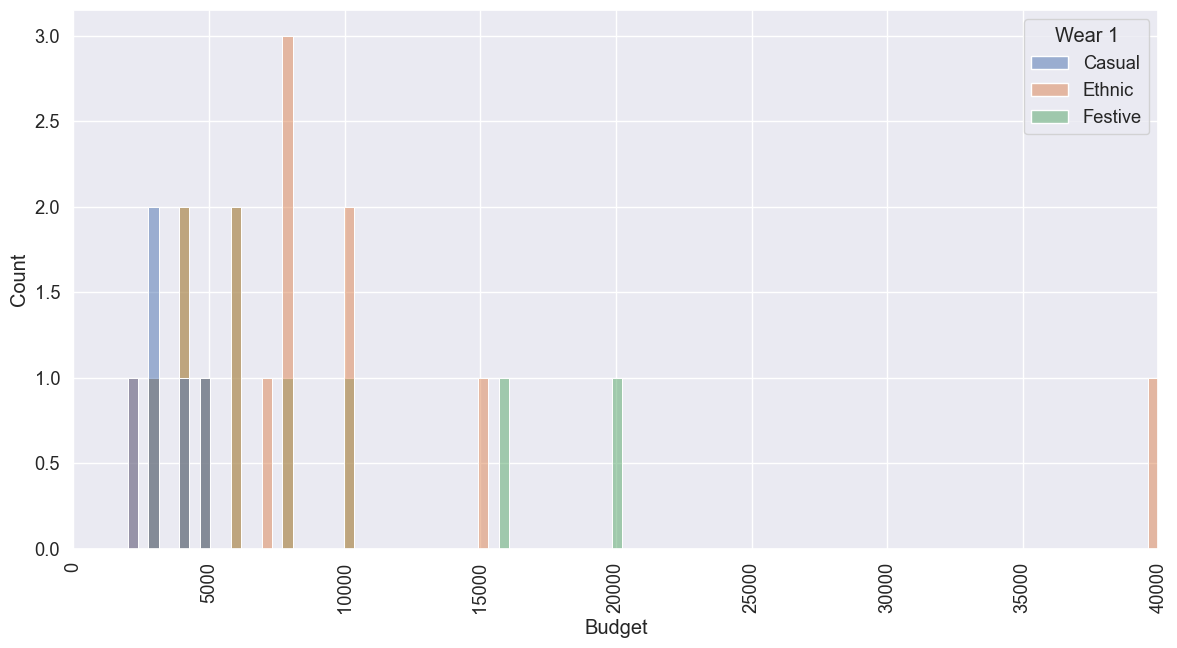

In [92]:
#wear vs budget
fig = plt.figure(figsize=(14,7))
sns.histplot(x=df['Budget'], hue=df['Wear 1'],bins=100)
plt.xticks(rotation=90)
plt.xlim(0,40000)

##### How frequent a customer visits a store/purchase

In [93]:
df.groupby(by=['Preferred brand','Frequency/year']).count()['ID']

Preferred brand  Frequency/year
Biba             2                 5
                 3                 3
                 4                 2
FabIndia         1                 2
                 2                 3
                 3                 4
                 4                 1
Manyavar         1                 3
                 2                 4
                 3                 2
                 4                 1
Name: ID, dtype: int64

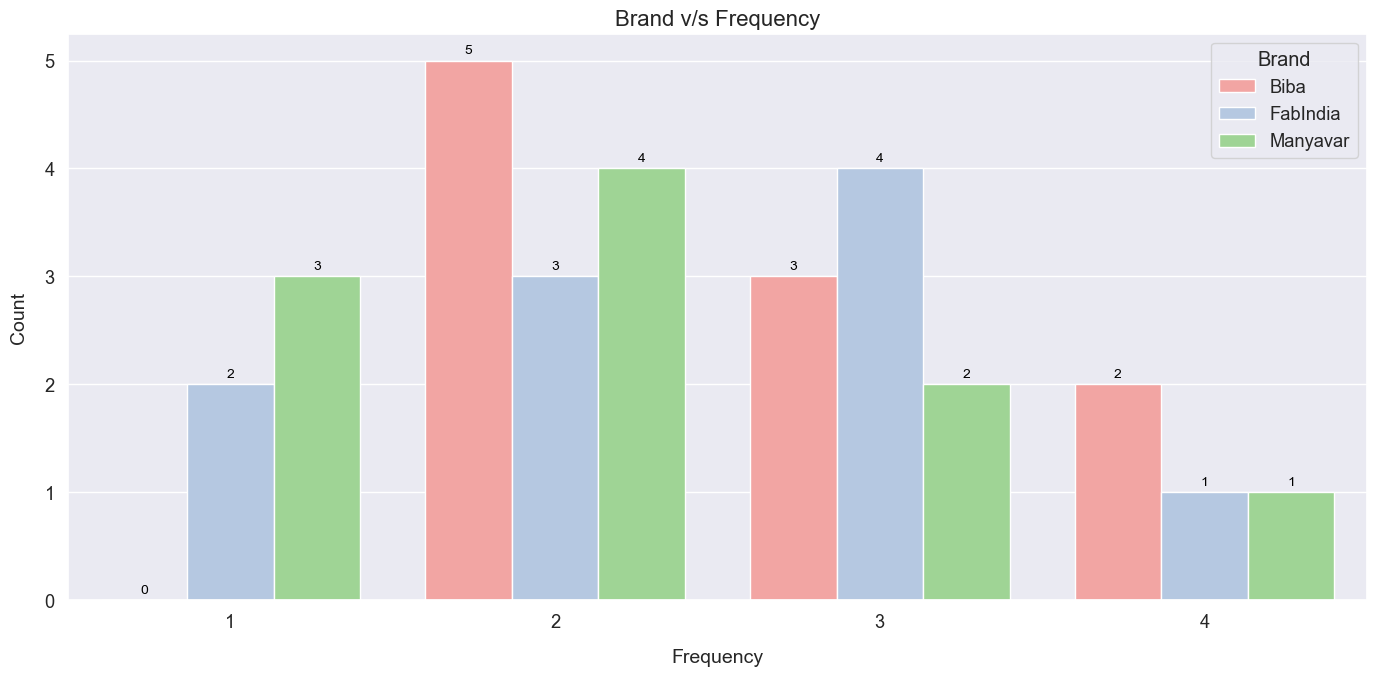

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 7))

df1 = pd.DataFrame({'Frequency': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
                    'Brand': ['Biba', 'FabIndia', 'Manyavar', 'Biba', 'FabIndia', 'Manyavar', 'Biba', 'FabIndia', 
                              'Manyavar', 'Biba', 'FabIndia', 'Manyavar'],
                    'Count': [0, 2, 3, 5, 3, 4, 3, 4, 2, 2, 1, 1]})

sns.set(style='darkgrid', font_scale=1.2)

custom_palette = {'Biba': '#FF9896', 'FabIndia': '#AEC7E8', 'Manyavar': '#98DF8A'}

ax = sns.barplot(x='Frequency', y='Count', hue='Brand', data=df1, palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3), 
                textcoords='offset points', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Frequency', fontsize=14, labelpad=12)
plt.ylabel('Count', fontsize=14, labelpad=12)
plt.title('Brand v/s Frequency', fontsize=16)

plt.tight_layout()
plt.show()


In [124]:
df.groupby(by=['Age Range','Preferred brand']).count()['ID']

Age Range  Preferred brand
20-25      Biba               3
           FabIndia           3
           Manyavar           2
25-30      Biba               3
           Manyavar           3
30-35      Biba               1
           Manyavar           3
35-40      Biba               1
           FabIndia           5
           Manyavar           1
40-45      Biba               1
45-50      FabIndia           1
           Manyavar           1
Below 20   Biba               1
           FabIndia           1
Name: ID, dtype: int64

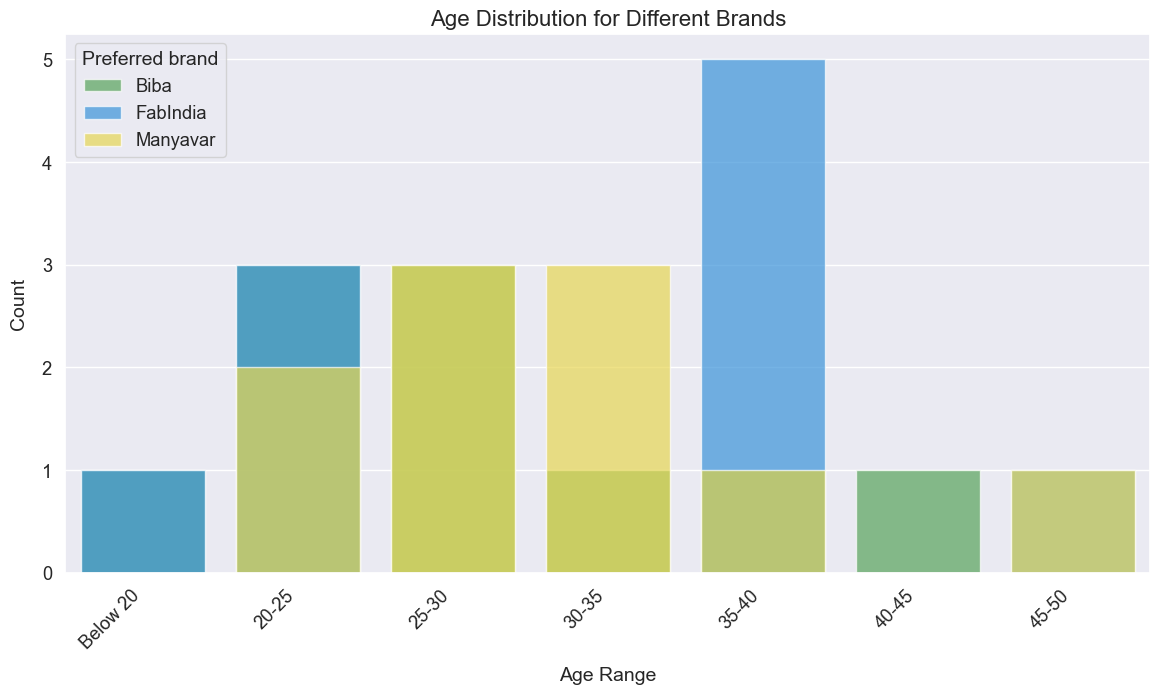

In [100]:
df1 = pd.DataFrame({
    'Age Range': ['Below 20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50'],
    'Biba': [1, 3, 3, 1, 1, 1, 0],
    'FabIndia': [1, 3, 0, 0, 5, 0, 1],
    'Manyavar': [0, 2, 3, 3, 1, 0, 1]
})

# Set the figure size and style
fig = plt.figure(figsize=(14, 7))
sns.set(style='darkgrid', font_scale=1.2)

# Create a stacked bar chart with translucent colors
sns.barplot(x='Age Range', y='Biba', data=df1, color='#4CAF50', alpha=0.7, label='Biba')
sns.barplot(x='Age Range', y='FabIndia', data=df1, color='#2196F3', alpha=0.7, label='FabIndia')
sns.barplot(x='Age Range', y='Manyavar', data=df1, color='#FFEB3B', alpha=0.7, label='Manyavar')

# Customize the plot
plt.xlabel('Age Range', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.title('Age Distribution for Different Brands', fontsize=16)
plt.legend(title='Preferred brand', title_fontsize='14', loc='upper left')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


##### Most preferred fabric

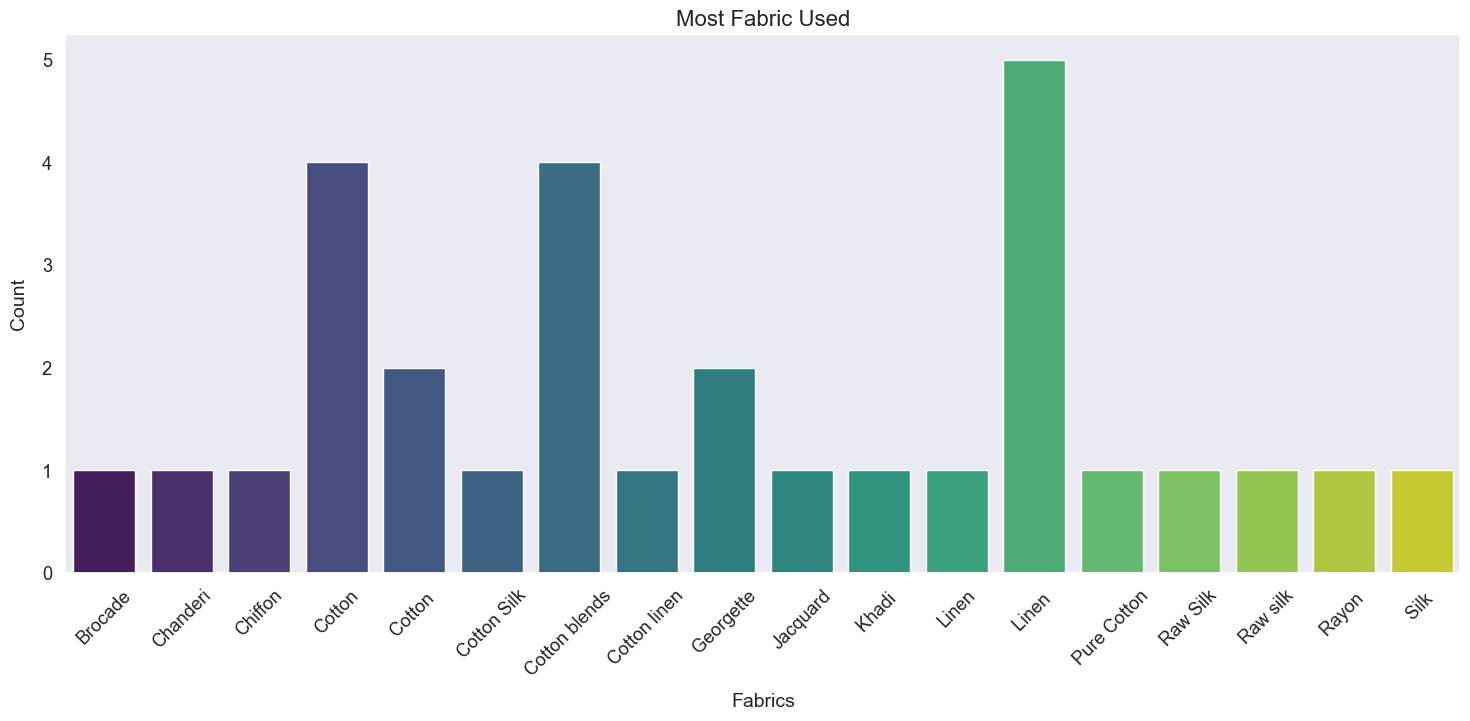

In [128]:
fabrics = df['Fabric 1'].unique()
fabrics.sort()

fig = plt.figure(figsize=(18, 7))
sns.set(style='dark', font_scale=1.2)

# Define the custom color palette with shades of yellow/green
num_colors = len(fabrics)
color_palette = sns.color_palette(sns.color_palette("viridis", num_colors), n_colors=num_colors)

sns.countplot(x='Fabric 1', data=df, order=fabrics, palette=color_palette)

plt.xticks(rotation=45)
plt.xlabel('Fabrics', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.title('Most Fabric Used', fontsize=16)

plt.show()


##### Most preferred color

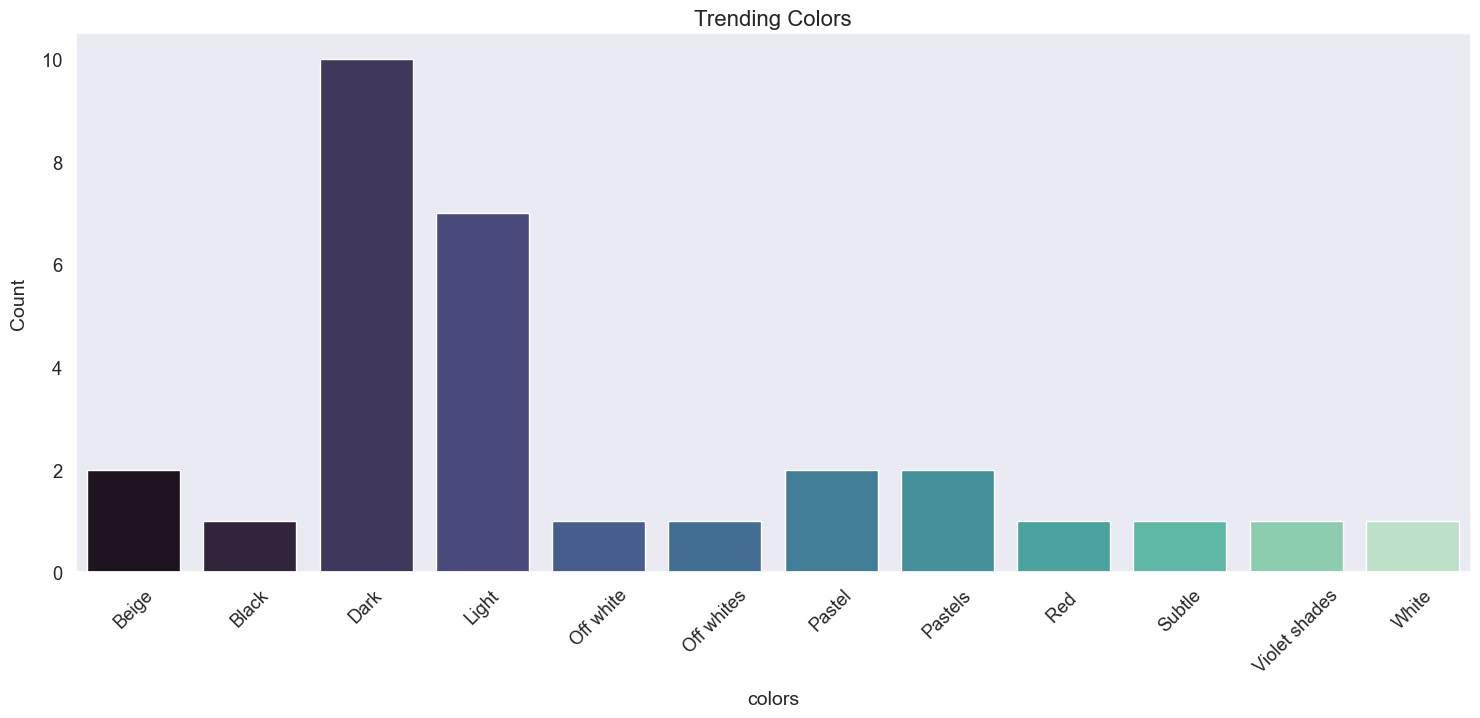

In [127]:
colors = df['Colours 1'].unique()
colors.sort()

fig = plt.figure(figsize=(18, 7))
sns.set(style='dark', font_scale=1.2)

# Define the custom color palette with shades of yellow/green
num_colors = len(colors)
color_palette = sns.color_palette(sns.color_palette("mako", num_colors), n_colors=num_colors)

sns.countplot(x='Colours 1', data=df, order=colors, palette=color_palette)

plt.xticks(rotation=45)
plt.xlabel('colors', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.title('Trending Colors', fontsize=16)

plt.show()
